In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('./mydata/simulation.csv')

<Axes: >

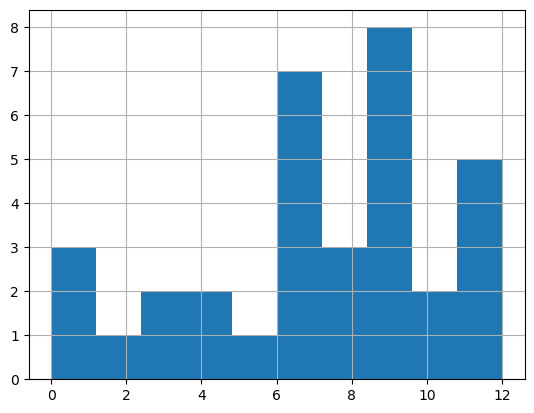

In [4]:
data['QoE'].hist()

In [5]:
# Drop unnamed columns
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [6]:
# Encode 'Config' (categorical feature)
label_encoder = LabelEncoder()
data['Config_encoded'] = label_encoder.fit_transform(data['Config'])
data.drop(columns=['Config'], inplace=True)

In [7]:
# Select features and target
target_column = 'Config_encoded'  # Replace this with the correct target column name
features = data.drop(columns=['Config_encoded'])  # Remove 'QoE' and original 'Config'
target = data[target_column]

In [8]:
# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
features_resampled, target_resampled = smote.fit_resample(features, target)

# Combine resampled features and target
balanced_data = pd.concat([features_resampled, pd.DataFrame(target_resampled, columns=[target_column])], axis=1)

In [9]:
balanced_data = balanced_data.drop(index=0)

In [33]:
# Select features and target
target_column = 'QoE'  # Replace this with the correct target column name
features = balanced_data.drop(columns= target_column)  # Remove 'QoE' and original 'Config'
target = balanced_data[target_column]

In [35]:
# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=2)
features_resampled, target_resampled = smote.fit_resample(features, target)

# Combine resampled features and target
balanced_data = pd.concat([features_resampled, pd.DataFrame(target_resampled, columns=[target_column])], axis=1)

<Axes: >

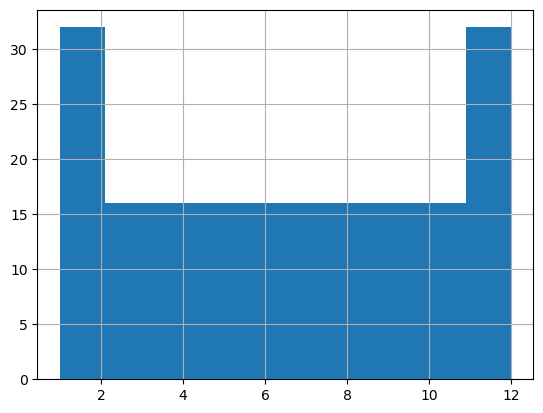

In [38]:
balanced_data['QoE'].hist()

In [13]:
# Select features and target
target_column = 'Config_encoded'  # Replace this with the correct target column name
features = balanced_data.drop(columns=['Config_encoded'])  # Remove 'QoE' and original 'Config'
target = balanced_data[target_column]

In [14]:
# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
features_resampled, target_resampled = smote.fit_resample(features, target)

# Combine resampled features and target
balanced_data = pd.concat([features_resampled, pd.DataFrame(target_resampled, columns=[target_column])], axis=1)

<Axes: >

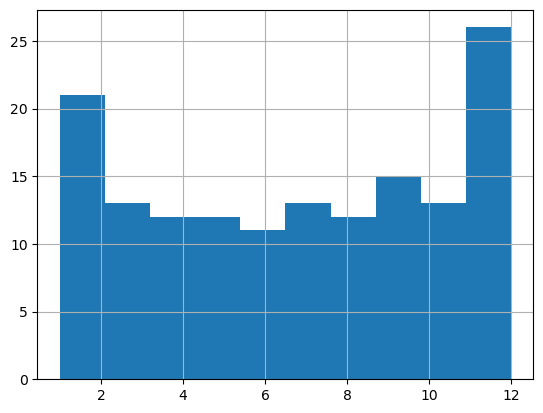

In [15]:
balanced_data['QoE'].hist()

In [40]:
# Decode 'Config_encoded' back to original
balanced_data['Config'] = label_encoder.inverse_transform(balanced_data['Config_encoded'])


<Axes: >

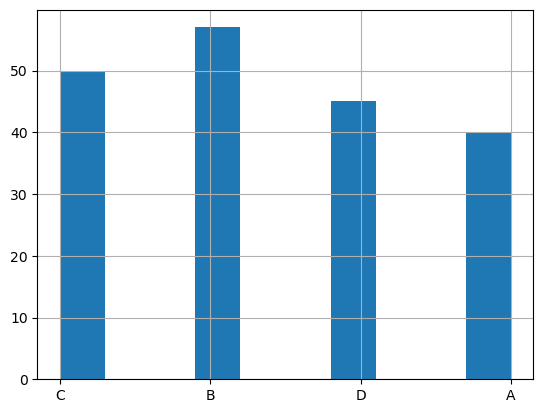

In [42]:
balanced_data['Config'].hist()

In [44]:
# Save the balanced data
balanced_file_path = ' ./mydata/simulation_balanced.csv'
balanced_data.to_csv(balanced_file_path, index=False)

print(f"Balanced data saved to {balanced_file_path}")

OSError: Cannot save file into a non-existent directory: ' ./mydata'